# Plot permittivity from a DFT calculation
Start by importing some useful routines

In [1]:
import numpy                      as np
import sys
sys.path.insert(0, "../../..")     # This should allow the PDielec modules to be found
from PDielec.HelperRoutines   import getMaterial
from PDielec.HelperRoutines   import calculatePowderSpectrum
from PDielec.HelperRoutines   import calculateSingleCrystalSpectrum


## Define the materials to be used.
In this example we read the VASP file in the current directory
The OUTCAR in this directory is for a VASP calculation on ZnO

In [2]:
ZnO = getMaterial('ZnO/OUTCAR')

## Print material information
The material print() function can be used to provide information about the material
Other functions that might be useful are getPermittivityFunction(), getCell() and getDensity()

In [3]:
ZnO.print()

Material name: Dielectric layer
Material density: 5.438839449152751
Material type: External permittivity
Material is scalar?: False
Material is tensor?: True
Material permittivity: External permittivity
Material unit cell
Space group international symbol is:  P6_3mc
Space group number is              :  186
Units for length are:  Angstrom
 
Unit Cell a,b,c 
     3.295058     3.295058     5.284824
 
Unit Cell alpha,beta,gamma
    90.000000    90.000000   120.000000
 
lattice
     2.853604    -1.647529     0.000000
     0.000000     3.295058     0.000000
     0.000000     0.000000     5.284824
 
Element names
 Zn        Zn        O         O        
 
Element masses
     65.38     65.38     16.00     16.00
 
Fractional coords
     0.333333     0.666667     0.000900
     0.666667     0.333333     0.500900
     0.333333     0.666667     0.381600
     0.666667     0.333333     0.881600
 
Cartesian coords
     0.951201     1.647529     0.004758
     1.902403    -0.000000     2.647170
     0.

## Use the permittivity function of the material
The permittivity function can be used to calculate the material permittivity over a range of frequencies

In [4]:
frequencies = np.arange(0,400,0.2)
permittivities = [ ZnO.getPermittivityFunction()(f) for f in frequencies]

## Plot the real and imaginary components of the permittivity 

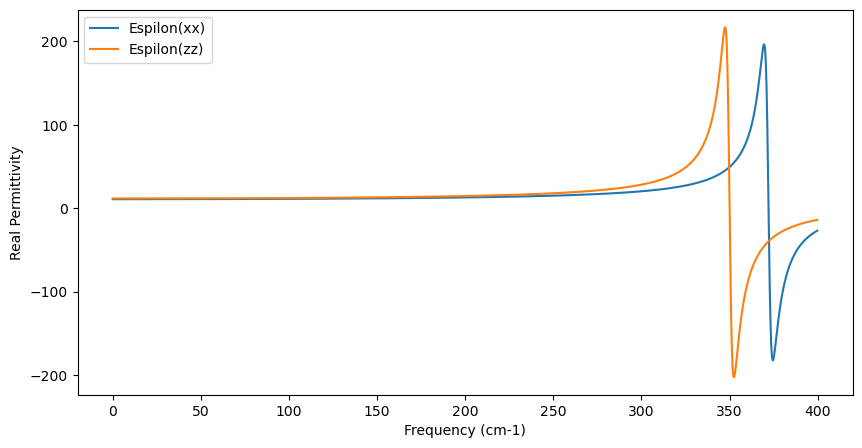

(<matplotlib.legend.Legend at 0x7a58f0d15890>, None)

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,5)) # set the size of the figure
plt.plot(frequencies, [ p[0,0].real for p in  permittivities ],label='Espilon(xx)') 
plt.plot(frequencies, [ p[2,2].real for p in  permittivities ],label='Espilon(zz)')
plt.xlabel('Frequency (cm-1)')
plt.ylabel('Real Permittivity')
plt.legend(), plt.show()

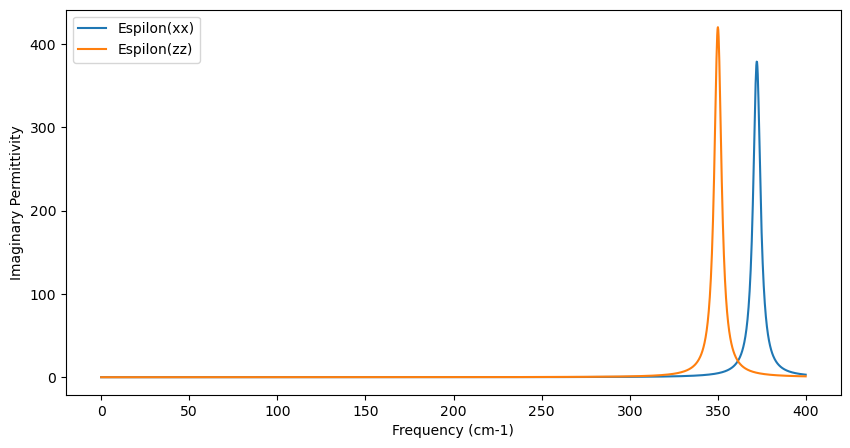

(<matplotlib.legend.Legend at 0x7a58f0bddb90>, None)

In [6]:
plt.figure(figsize = (10,5)) 
plt.plot(frequencies, [ p[0,0].imag for p in  permittivities ],label='Espilon(xx)') 
plt.plot(frequencies, [ p[2,2].imag for p in  permittivities ],label='Espilon(zz)')
plt.xlabel('Frequency (cm-1)')
plt.ylabel('Imaginary Permittivity')
plt.legend(), plt.show()